# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
# query_url = url + "&appid=" + weather_api_key + "&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | parabel'
Processing Record 3 of Set 1 | blackmans bay
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | anzio
Processing Record 6 of Set 1 | kapa'a
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | invercargill
Processing Record 9 of Set 1 | nizhniy kuranakh
Processing Record 10 of Set 1 | sodra sandby
Processing Record 11 of Set 1 | lihue
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | vadso
Processing Record 14 of Set 1 | taiohae
City not found. Skipping...
Processing Record 15 of Set 1 | bonthe
Processing Record 16 of Set 1 | fort saskatchewan
Processing Record 17 of Set 1 | avarua
Processing Record 18 of Set 1 | holualoa
Processing Record 19 of Set 1 | bilibino
Processing Record 20 of Set 1 | talnakh
Processing Record 21 of Set 1 | hermanus
Processing Record 22 of Set 1 | 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,19.90,85,100,7.39,PN,1693951385
1,parabel',58.6978,81.4825,11.10,98,95,3.55,RU,1693951785
2,blackmans bay,-43.0167,147.3167,10.41,68,95,3.59,AU,1693951383
3,grytviken,-54.2811,-36.5092,-4.06,79,48,4.71,GS,1693951383
4,anzio,41.4853,12.6179,23.89,54,0,2.35,IT,1693951785


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,19.90,85,100,7.39,PN,1693951385
1,parabel',58.6978,81.4825,11.10,98,95,3.55,RU,1693951785
2,blackmans bay,-43.0167,147.3167,10.41,68,95,3.59,AU,1693951383
3,grytviken,-54.2811,-36.5092,-4.06,79,48,4.71,GS,1693951383
4,anzio,41.4853,12.6179,23.89,54,0,2.35,IT,1693951785


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

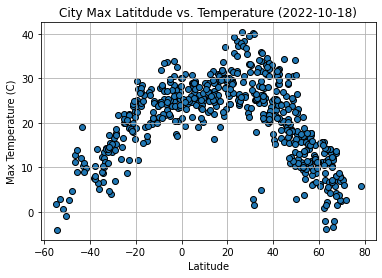

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitdude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

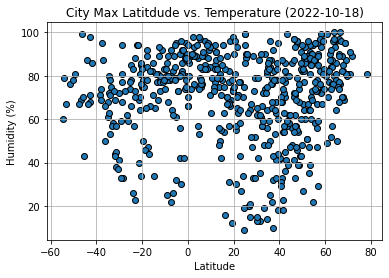

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitdude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

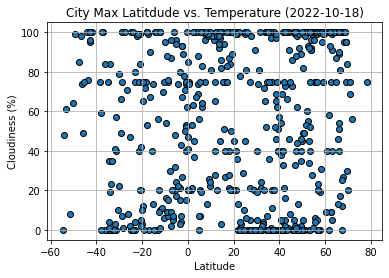

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitdude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

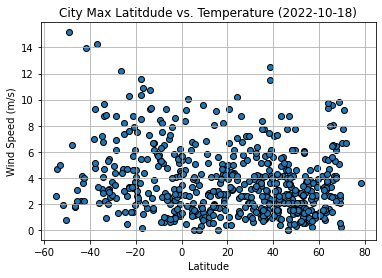

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitdude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("oFig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [30]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x_values, y_values, eq_loc):
    correlation = st.pearsonr(x_values, y_values)
    slope, intercept, r_value, p_value, std_err = st.linregress(x_values, y_values)
    regression_line = slope * x_values + intercept
    eq = f"y = {slope:.2f}x + {intercept:.2f}"

    plt.plot(x_values, y_values, marker='o')
    plt.plot(x_values, regression_line, "--", color="red")
    plt.annotate(eq, eq_loc, fontsize=15, color="red")
    print(f"The r-value between x and y is {round(correlation[0], 2)}")


In [31]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
north_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
north_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,parabel',58.6978,81.4825,11.10,98,95,3.55,RU,1693951785
4,anzio,41.4853,12.6179,23.89,54,0,2.35,IT,1693951785
5,kapa'a,22.0752,-159.3190,29.71,71,0,3.13,US,1693951397
8,nizhniy kuranakh,58.8353,125.4869,8.70,74,100,2.58,RU,1693951786
9,sodra sandby,56.5667,16.6167,17.72,78,0,3.69,SE,1693951786


In [32]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,19.90,85,100,7.39,PN,1693951385
2,blackmans bay,-43.0167,147.3167,10.41,68,95,3.59,AU,1693951383
3,grytviken,-54.2811,-36.5092,-4.06,79,48,4.71,GS,1693951383
6,punta arenas,-53.1500,-70.9167,2.99,67,61,4.96,CL,1693951215
7,invercargill,-46.4000,168.3500,11.12,99,74,1.79,NZ,1693951409


###  Temperature vs. Latitude Linear Regression Plot

The r-value between x and y is -0.7


Text(0.5, 0, 'Max Temp')

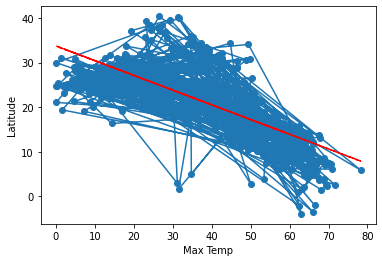

In [33]:
# Linear regression on Northern Hemisphere
linear_regression_plot(north_hemi_df["Lat"], north_hemi_df["Max Temp"], (10, -10))
plt.ylabel("Latitude")
plt.xlabel("Max Temp")

The r-value between x and y is 0.84


Text(0.5, 0, 'Latitude')

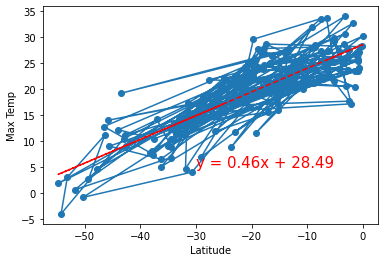

In [36]:
# Linear regression on Southern Hemisphere
linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],(-30, 5))
plt.ylabel("Max Temp")
plt.xlabel("Latitude")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value between x and y is 0.04


Text(0.5, 0, 'Humidity (%)')

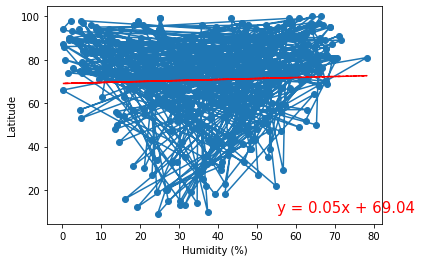

In [37]:
# Northern Hemisphere
linear_regression_plot(north_hemi_df["Lat"], north_hemi_df["Humidity"], (55, 10))
plt.ylabel("Latitude")
plt.xlabel("Humidity (%)")

The r-value between x and y is 0.14


Text(0.5, 0, 'Humidity (%)')

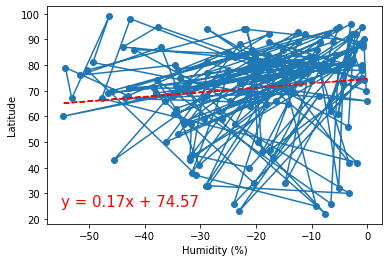

In [38]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], (-55, 25))
plt.ylabel("Latitude")
plt.xlabel("Humidity (%)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value between x and y is 0.03


Text(0.5, 0, 'Cloudiness (%)')

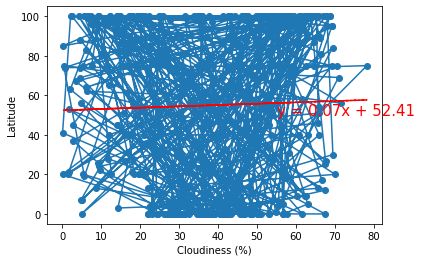

In [39]:
# Northern Hemisphere
linear_regression_plot(north_hemi_df["Lat"], north_hemi_df["Cloudiness"], (55, 50))
plt.ylabel("Latitude")
plt.xlabel("Cloudiness (%)")

The r-value between x and y is -0.06


Text(0.5, 0, 'Cloudiness (%)')

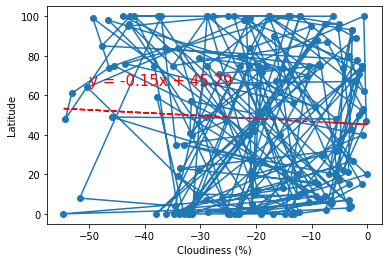

In [41]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], (-50, 65))
plt.ylabel("Latitude")
plt.xlabel("Cloudiness (%)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value between x and y is -0.01


Text(0.5, 0, 'Wind Speed (m/s)')

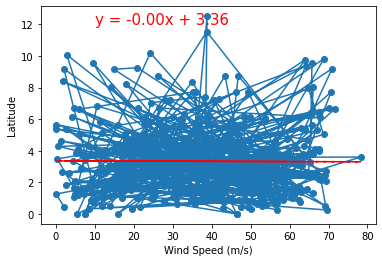

In [42]:
# Northern Hemisphere
linear_regression_plot(north_hemi_df["Lat"], north_hemi_df["Wind Speed"], (10, 12))
plt.ylabel("Latitude")
plt.xlabel("Wind Speed (m/s)")

The r-value between x and y is -0.12


Text(0.5, 0, 'Wind Speed (m/s)')

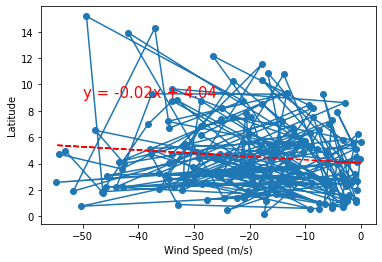

In [43]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], (-50, 9))
plt.ylabel("Latitude")
plt.xlabel("Wind Speed (m/s)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE